In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta

taxi_df = pd.read_csv('trip.csv')

In [66]:
taxi_df.info()
# 'fare_amount' 결측치 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [67]:
taxi_df.describe()
# 'passenger_count' = (0,36) 이상치 확인
# 'trip_distance' = 0, 이상치 확인
# 'fare_amount' =(0,999) 이상치 확인
# 톨비가 있는 fare 확인 필요

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


In [68]:
taxi_df.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


--------------------------
# 이름

In [69]:
# 이름
taxi_df['passenger_name'].sort_values()
# 특수 기호, 숫자로 시작하는 이름은 없음
taxi_df['passenger_name'].apply(len).min() # 값 : 7
print(taxi_df[taxi_df['passenger_name'].apply(len) == 7]['passenger_name'])
# 가장 짧은 이름도 문제 없음
taxi_df['passenger_name'] = taxi_df['passenger_name'].astype('string')
pass

1067     Mary Yu
3400     Pam Lee
3818     Jo Vang
4070     Amy Roy
4158     Mark Li
5858     Lisa Le
8703     Lisa Wu
9902     Kurt Le
10564    Anna Le
16706    Amy Fox
17638    Lori Le
18131    Luke Yu
19821    John Le
20372    Jose Le
22010    Eric Ho
22367    Jo Vega
Name: passenger_name, dtype: object


--------------------------------
# 승하차 시간

In [70]:
# 승하차 시간
taxi_df['tpep_pickup_datetime'].sort_values()
# 분단위로 다른 것을 보아, 하나의 택시의 정보는 아닐 것으로 추정

# 중복 발견
taxi_df[taxi_df.duplicated()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.00,0.0


In [71]:
taxi_df = taxi_df.drop_duplicates()
taxi_df[taxi_df.duplicated()]
#중복 제거 완료

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount


In [72]:
# 형식 변환
taxi_df['tpep_pickup_datetime'] = pd.to_datetime(taxi_df['tpep_pickup_datetime'])
taxi_df['tpep_dropoff_datetime'] = pd.to_datetime(taxi_df['tpep_dropoff_datetime'])
# 탑승 시간 피쳐 생성
taxi_df['trip_time']=taxi_df['tpep_dropoff_datetime']-taxi_df['tpep_pickup_datetime']
taxi_df['trip_time'].sort_values()
# 음수 탑승 시간 : 승차시간과 하차시간이 반대로 찍혔을 가능성
# 24시간에 가까운 탑승시간 : ???

9358    -1 days +23:43:01
14064     0 days 00:00:00
19840     0 days 00:00:00
17272     0 days 00:00:00
8891      0 days 00:00:00
               ...       
15165     0 days 23:58:33
22640     0 days 23:58:39
15000     0 days 23:58:51
15581     0 days 23:59:09
926       0 days 23:59:33
Name: trip_time, Length: 22699, dtype: timedelta64[ns]

In [73]:
# 0보다 작은 탑승 시간 or 오래 탔으면서 요금이 적은
outlier_taxi = taxi_df[(taxi_df['trip_time'] < timedelta(minutes=0))|((taxi_df['trip_time'] > timedelta(hours=1))&(taxi_df['fare_amount'] < 20))]
outlier_taxi.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,trip_time
699,Scott Garcia,2017-06-10 21:55:01,2017-06-11 21:45:51,Debit Card,1,1.36,8.5,1.47,0.0,0 days 23:50:50
926,Michael Perez,2017-02-09 23:24:58,2017-02-10 23:24:31,Cash,5,4.86,17.5,0.00,0.0,0 days 23:59:33
1012,James Anderson,2017-12-08 07:17:20,2017-12-09 07:07:22,Cash,1,0.33,4.5,0.00,0.0,0 days 23:50:02
1201,Carla Allen,2017-11-12 19:52:44,2017-11-13 19:37:35,Credit Card,1,4.14,18.0,3.76,0.0,0 days 23:44:51
1357,Jamie Collins,2017-04-17 21:26:49,2017-04-18 20:46:13,Cash,6,4.09,15.0,0.00,0.0,0 days 23:19:24


In [74]:
# 36개의 이상치 drop
taxi_df=taxi_df.drop(outlier_taxi.index)

---------------------
# 결제 수단


In [75]:
# 결제 수단
print(taxi_df['payment_method'].value_counts())
# 가짓수 이상 없음
taxi_df['payment_method'] = taxi_df['payment_method'].astype('string')

payment_method
Cash           11175
Debit Card      5776
Credit Card     5712
Name: count, dtype: int64


---------------------
# 승객 수

In [76]:
taxi_df['passenger_count'].value_counts(normalize=True)*100
# 0, 36 은 이상이 있는 값
# 합쳐도 1%가 안 되기 때문에 drop

passenger_count
1     71.014429
2     14.565591
5      5.025813
3      4.200680
6      3.044610
4      1.998853
0      0.145612
36     0.004412
Name: proportion, dtype: float64

In [77]:
# 0이거나 36명인 행
passenger_outlier = taxi_df[(taxi_df['passenger_count'] == 0)|(taxi_df['passenger_count']==36)]
taxi_df=taxi_df.drop(passenger_outlier.index,axis=0)
taxi_df['passenger_count'].value_counts()

passenger_count
1    16094
2     3301
5     1139
3      952
6      690
4      453
Name: count, dtype: int64

--------------------
# 주행 거리

In [78]:
taxi_df['trip_distance'].value_counts().sort_index()
# 147개의 0 발견
# 0.64%의 비율 drop

trip_distance
0.00     147
0.01       7
0.02      11
0.03       4
0.04       4
        ... 
30.83      1
31.95      1
32.72      1
33.92      1
33.96      1
Name: count, Length: 1545, dtype: int64

In [79]:
'''
# 0을 제외한 분포 그래프
sns.barplot(x= taxi_df[taxi_df['trip_distance']!=0]['trip_distance'].value_counts().index, y = taxi_df[taxi_df['trip_distance']!=0]['trip_distance'].value_counts())
# 오른쪽 꼬리가 긴 형태이므로 평균으로 할 시 결과가 왜곡될 수 있음. 결측치를 중앙값으로 대체
distance_outlier=taxi_df[taxi_df['trip_distance']==0].index # 향후 값의 fare 피쳐와의 상관관계를 따져보기 위하여 인덱스 기억
taxi_df.loc[distance_outlier,'trip_distance']=taxi_df[taxi_df['trip_distance']!=0]['trip_distance'].median()
'''
pass

In [80]:
distance_outlier = taxi_df[taxi_df['trip_distance']==0]
taxi_df=taxi_df.drop(distance_outlier.index,axis=0)
taxi_df['trip_distance'].value_counts().sort_index()

trip_distance
0.01      7
0.02     11
0.03      4
0.04      4
0.05      1
         ..
30.83     1
31.95     1
32.72     1
33.92     1
33.96     1
Name: count, Length: 1544, dtype: int64

--------------------
# 요금

In [81]:
taxi_df['fare_amount'].value_counts().sort_index()
# 음수의 요금 발견
# 999.99 값의 요금 발견

fare_amount
-4.50      2
-4.00      2
-3.50      3
-3.00      2
-2.50      3
          ..
 140.00    1
 150.00    1
 152.00    1
 200.01    1
 999.99    1
Name: count, Length: 173, dtype: int64

In [82]:
print(taxi_df[(taxi_df['fare_amount'] <= 0)|(taxi_df['fare_amount'] >450)].count())
# 15개의 이상치 drop 

passenger_name           15
tpep_pickup_datetime     15
tpep_dropoff_datetime    15
payment_method           15
passenger_count          15
trip_distance            15
fare_amount              15
tip_amount               15
tolls_amount             15
trip_time                15
dtype: int64


In [83]:
fare_outlier = taxi_df[(taxi_df['fare_amount'] <= 0)|(taxi_df['fare_amount'] >450)]
taxi_df=taxi_df.drop(fare_outlier.index,axis=0)
taxi_df['fare_amount'].value_counts().sort_index()

fare_amount
0.01        1
2.50       42
3.00       89
3.50      293
4.00      548
         ... 
131.00      1
140.00      1
150.00      1
152.00      1
200.01      1
Name: count, Length: 166, dtype: int64

--------------
# 팁

In [84]:
taxi_df['tip_amount'].value_counts().sort_index()
# 팁은 얼마를 주든 자유, 결측치만 없으면

tip_amount
0.00     7911
0.01        8
0.02        4
0.03        1
0.04        1
         ... 
25.20       2
28.00       1
42.29       1
51.64       1
55.50       1
Name: count, Length: 730, dtype: int64

In [85]:
taxi_df['tip_amount'].isna().sum()
# 결측치 없음

np.int64(0)

-----------------------
# 톨비

In [86]:
taxi_df['tolls_amount'].value_counts().sort_index()

tolls_amount
0.00     21309
2.16         1
2.54         6
2.64        10
2.70         1
4.32         1
5.16         1
5.44         1
5.45         1
5.49         1
5.54       236
5.76       839
6.00         1
6.32         1
8.00         1
8.16         1
8.40         1
8.50         2
10.50       21
11.52        2
12.50       10
13.00        1
15.00        1
15.50        2
15.58        1
16.00        2
16.20        1
16.26        3
16.50        2
16.62        1
17.28        1
17.50        1
18.00        1
18.26        1
18.28        1
19.10        1
Name: count, dtype: int64

In [87]:
taxi_df['tolls_amount'].isna().sum()

np.int64(0)

---------
# 총 금액

In [88]:
taxi_df['in_total']=(taxi_df['fare_amount']+taxi_df['tip_amount']+taxi_df['tolls_amount'])
taxi_df

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,trip_time,in_total
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Debit Card,6,3.34,13.0,2.76,0.00,0 days 00:14:04,15.76
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Debit Card,1,1.80,16.0,4.00,0.00,0 days 00:26:30,20.00
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Debit Card,1,1.00,6.5,1.45,0.00,0 days 00:07:12,7.95
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.00,0 days 00:30:15,26.89
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Debit Card,1,4.37,16.5,0.00,0.00,0 days 00:16:43,16.50
...,...,...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,2017-02-24 17:37:23,2017-02-24 17:40:39,Cash,3,0.61,4.0,0.00,0.00,0 days 00:03:16,4.00
22697,Monique Williams,2017-08-06 16:43:59,2017-08-06 17:24:47,Cash,1,16.71,52.0,14.64,5.76,0 days 00:40:48,72.40
22698,Drew Graves,2017-09-04 14:54:14,2017-09-04 14:58:22,Debit Card,1,0.42,4.5,0.00,0.00,0 days 00:04:08,4.50
22699,Jonathan Copeland,2017-07-15 12:56:30,2017-07-15 13:08:26,Debit Card,1,2.36,10.5,1.70,0.00,0 days 00:11:56,12.20


------------------
# 상관관계 분석

In [59]:
taxi_df.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,trip_time
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Debit Card,6,3.34,13.0,2.76,0.0,0 days 00:14:04
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Debit Card,1,1.80,16.0,4.00,0.0,0 days 00:26:30
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Debit Card,1,1.00,6.5,1.45,0.0,0 days 00:07:12
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.0,0 days 00:30:15
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Debit Card,1,4.37,16.5,0.00,0.0,0 days 00:16:43


<Axes: >

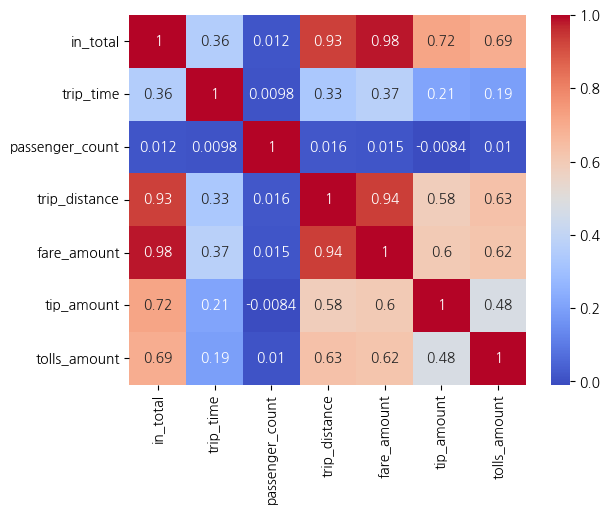

In [89]:
taxi_df=taxi_df[['in_total','trip_time','passenger_count','trip_distance','fare_amount','tip_amount','tolls_amount']]
sns.heatmap(taxi_df.corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='trip_distance', ylabel='fare_amount'>

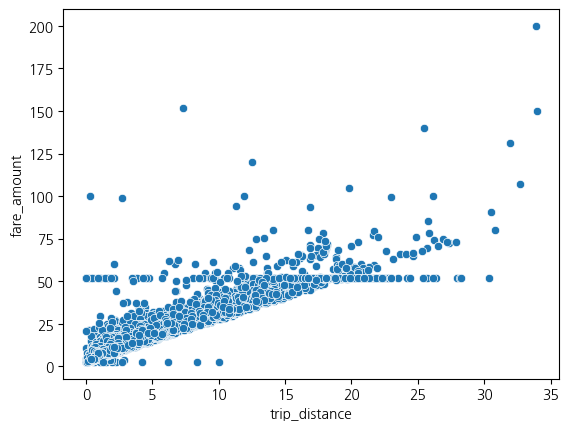

In [61]:
# '주행 거리'와 '요금'은 거의 선형관계에 있다.
# '주행 거리'가 적어도 '요금'은 클 가능성 있음(톨비, 교통상황 등). 그러나 '주행 거리'가 길어짊에도 '요금'이 적은 것은 문제가 있다.
sns.scatterplot(taxi_df[['trip_distance','fare_amount']],x='trip_distance',y='fare_amount')

In [90]:
taxi_df[(taxi_df['trip_distance']>4)&(taxi_df['fare_amount'] <3)]
# 5개의 이상치 발견

,in_total,trip_time,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
2225,2.50,0 days 00:00:03,1,10.0,2.50,0.0,0.0
4063,10.51,0 days 00:29:21,4,4.5,0.01,0.0,10.5
13308,2.50,0 days 00:00:02,1,8.4,2.50,0.0,0.0
15501,2.50,0 days 00:00:45,1,4.2,2.50,0.0,0.0
19030,12.50,0 days 00:00:13,1,6.2,2.50,10.0,0.0


In [92]:
taxi_df=taxi_df.drop(taxi_df[(taxi_df['trip_distance']>4)&(taxi_df['fare_amount'] <3)].index)
taxi_df

In [93]:
taxi_df

,in_total,trip_time,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,15.76,0 days 00:14:04,6,3.34,13.0,2.76,0.00
1,20.00,0 days 00:26:30,1,1.80,16.0,4.00,0.00
2,7.95,0 days 00:07:12,1,1.00,6.5,1.45,0.00
3,26.89,0 days 00:30:15,1,3.70,20.5,6.39,0.00
4,16.50,0 days 00:16:43,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...
22696,4.00,0 days 00:03:16,3,0.61,4.0,0.00,0.00
22697,72.40,0 days 00:40:48,1,16.71,52.0,14.64,5.76
22698,4.50,0 days 00:04:08,1,0.42,4.5,0.00,0.00
22699,12.20,0 days 00:11:56,1,2.36,10.5,1.70,0.00


<Axes: xlabel='trip_time', ylabel='in_total'>

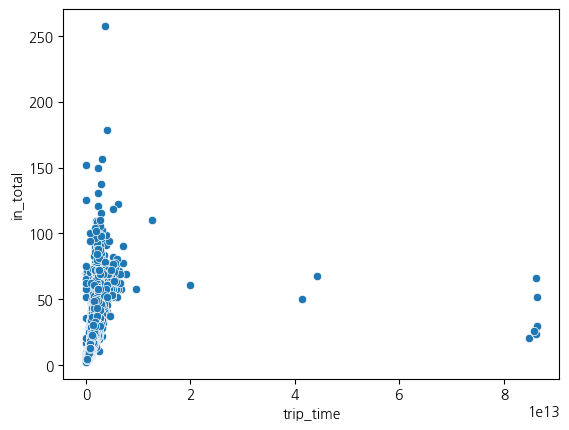

In [95]:
sns.scatterplot(taxi_df[['trip_time','in_total']],x='trip_time',y='in_total')
# 4시간이 넘음에도 값이 증가하지 않는 값 검색

In [98]:
taxi_df[taxi_df['trip_time']>timedelta(hours=4)]

,in_total,trip_time,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
5053,60.96,0 days 05:32:07,1,14.35,50.5,10.46,0.00
6495,52.00,0 days 23:57:50,1,15.60,52.0,0.00,0.00
7014,66.54,0 days 23:56:40,1,19.76,52.0,8.78,5.76
10931,28.50,0 days 23:55:07,6,6.37,28.5,0.00,0.00
11674,20.50,0 days 23:33:04,3,3.32,20.5,0.00,0.00
11887,67.41,0 days 12:16:03,1,7.53,50.5,11.37,5.54
13221,50.01,0 days 11:29:53,1,12.53,36.0,8.47,5.54
13798,24.50,0 days 23:50:51,3,7.67,24.5,0.00,0.00
18652,23.50,0 days 23:56:58,1,4.70,23.5,0.00,0.00
21368,29.50,0 days 23:58:16,1,3.13,29.5,0.00,0.00


In [99]:
taxi_df = taxi_df.drop(taxi_df[taxi_df['trip_time']>timedelta(hours=4)].index)

<Axes: xlabel='tip_amount', ylabel='in_total'>

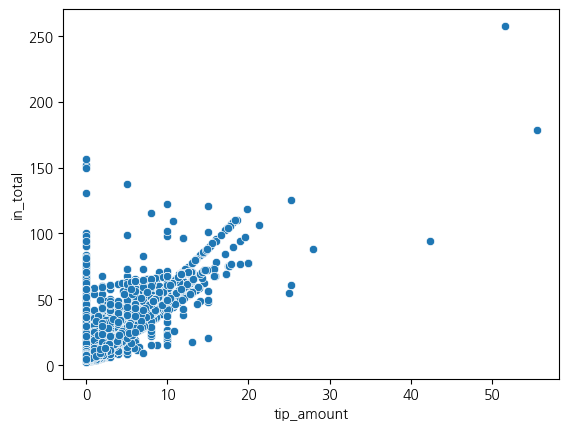

In [103]:
sns.scatterplot(taxi_df[['tip_amount','in_total']],x='tip_amount',y='in_total')

<Axes: >

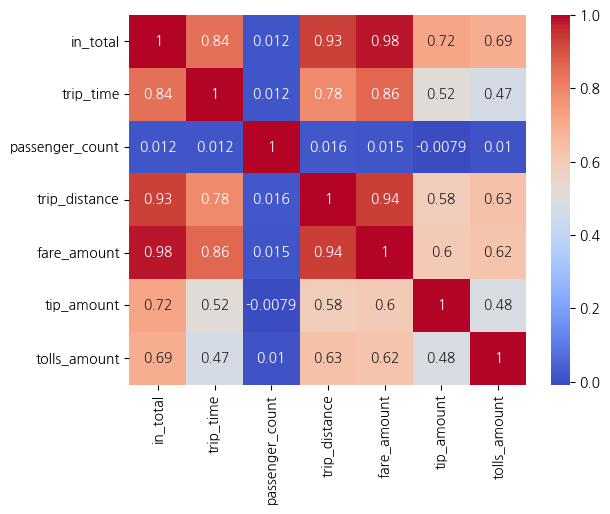

In [104]:
taxi_df=taxi_df[['in_total','trip_time','passenger_count','trip_distance','fare_amount','tip_amount','tolls_amount']]
sns.heatmap(taxi_df.corr(), annot=True, cmap='coolwarm')